Valor de propina: 
19.847607361963192


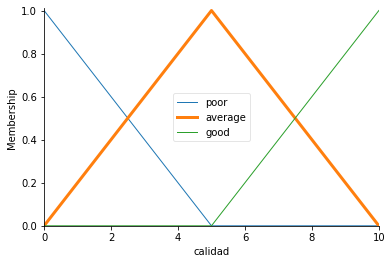

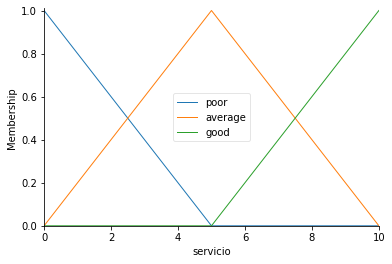

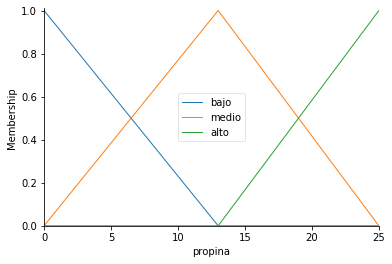

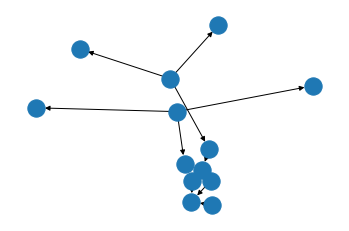

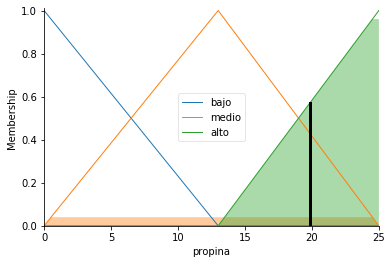

In [3]:
# CONTROL DIFUSO API 

# elimina las advertencias
import warnings 
warnings.filterwarnings('ignore')

# importa las librerias 
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline 

# se crean los objetos antecedentes y consecuente a partir de
# las variables del universo  y las funciones de membresía 

calidad = ctrl.Antecedent(np.arange(0,11,1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0,11,1), 'servicio')
propina = ctrl.Consequent(np.arange(0,26,1), 'propina')

# la poblacion de la función de membresía automática es posible con .automf (3, 5 o 7)
calidad.automf(3)
servicio.automf(3)

# las funciones de membresía personalizado se pueden construir interactivamente con la 
# API pythonic
propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['medio'] = fuzz.trimf(propina.universe, [0, 13, 25])
propina['alto'] = fuzz.trimf(propina.universe, [13, 25, 25])

# visualización con .view()
calidad['average'].view()
servicio.view()
propina.view()

# creación de las reglas 
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(servicio['average'], propina['medio'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])

# visualización de la regla 1 
regla1.view()

#generación del simulador 
control_propina = ctrl.ControlSystem([regla1, regla2, regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)

# Pasar entradas al controlSystem usando etiquetas 'Antecedent' con Pythonic API
# nota: si quiere pasar muchas entradas a la vez, usar inputs (dict_of_data)
asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

# se obtiene el valor
asignacion_propina.compute()

# se muestra la información 
print("Valor de propina: ")
print(asignacion_propina.output['propina'])

# se muestra la curba de asignación de propina 
propina.view(sim=asignacion_propina)

